In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data_gpt2.csv")

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,25590,25591,25592,25593,25594,25595,25596,25597,25598,25599
0,3.899300,7.565520,1.296009,-6.861289,-5.934815,4.148840,8.311052,-0.166117,-6.853495,-4.057329,...,0.215856,0.295866,-1.204017,-1.127772,1.916237,2.095459,-2.029180,-5.232660,1.396363,7.535430
1,-0.951626,-0.026867,0.475558,-0.157340,-0.342464,0.165069,0.143682,-0.368740,-0.219467,0.256157,...,-0.526606,-0.207053,0.030481,0.001685,-0.389913,-0.147019,0.320774,-0.054070,-0.336892,0.117773
2,-3.929285,-7.165016,-0.110136,4.738086,2.834087,-1.568131,-3.172974,-1.409300,0.567256,3.044535,...,5.447790,-5.573459,-4.879050,4.606160,4.547146,-4.647161,-3.728426,5.277608,3.435046,-5.358367
3,-2.782683,5.760739,3.001560,-5.608408,-2.907724,5.079184,2.826995,-4.344326,-2.332803,4.276500,...,-0.066088,0.452963,-0.050988,-0.799437,-0.406508,-0.030547,-0.112657,-0.351845,-0.337875,-0.369204
4,-0.272671,-0.121940,-0.026397,0.054517,-0.398982,-0.034386,0.324217,0.461581,-0.208683,-0.133903,...,-0.044933,0.178991,0.331815,0.082452,0.144409,0.025489,-0.240097,-0.179325,0.124719,0.158147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,-0.052208,-0.047765,-0.057964,-0.077043,-0.010430,-0.000896,-0.038360,-0.003680,0.028351,0.063056,...,-0.083922,-0.131187,-0.070836,-0.014751,-0.022985,-0.063500,-0.070610,0.041211,0.067359,-0.003533
1236,0.016248,0.038758,0.070990,0.059766,-0.023504,-0.034588,0.012580,-0.070610,-0.062291,-0.029186,...,0.078668,0.061585,0.074139,0.009022,-0.022179,0.018452,0.001435,-0.043908,-0.009173,0.078699
1237,0.012629,-0.012334,-0.036590,0.050409,0.040265,0.059400,-0.026275,0.041706,0.084198,0.056348,...,-0.078838,0.169872,0.009046,0.147631,0.093811,-0.103642,-0.123845,-0.017547,0.111096,0.095404
1238,-0.144944,-0.141777,0.059033,0.094421,0.037653,0.050934,0.086682,-0.025554,-0.001824,0.029017,...,0.058161,0.091125,-0.028356,-0.137260,-0.060539,0.060279,0.118090,-0.005169,-0.002489,-0.086101


## 외륜

In [6]:
row_650 = data.iloc[649, :-1].values

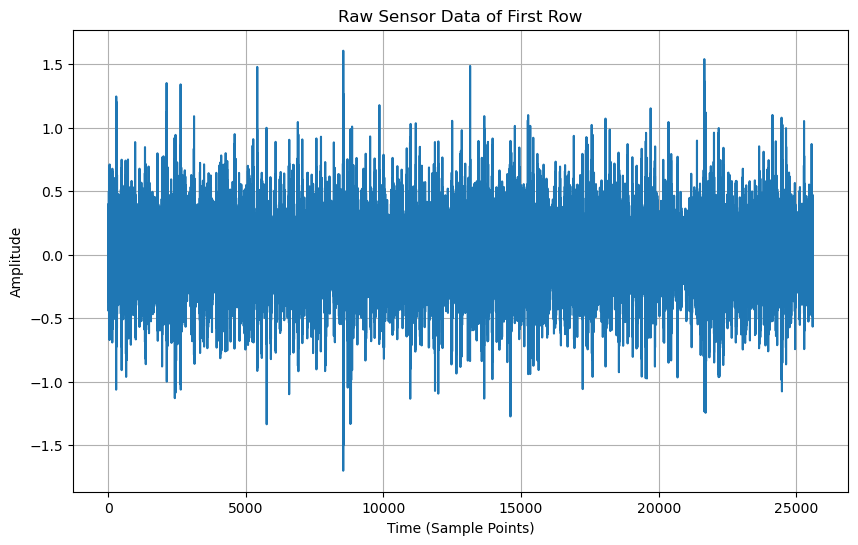

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(row_650)
plt.title('Raw Sensor Data of First Row')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

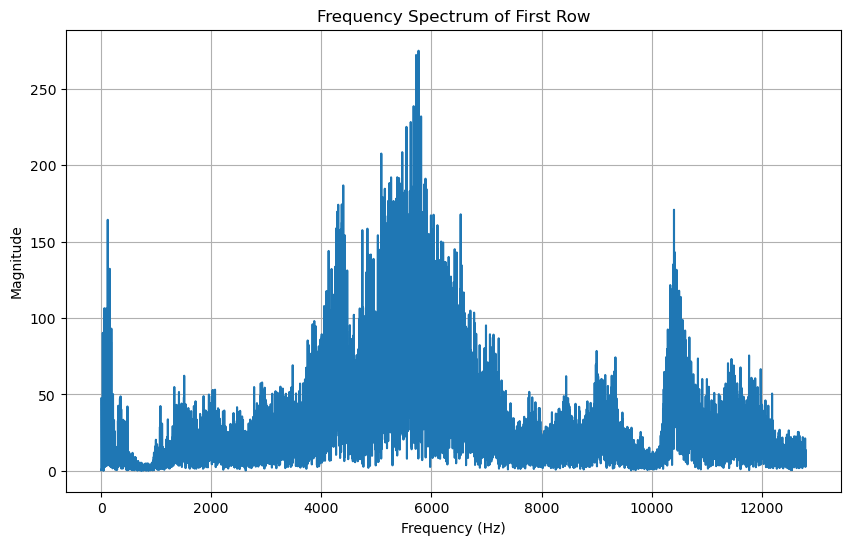

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 적용
fft_values = np.fft.fft(row_650)
fft_magnitude = np.abs(fft_values)  # FFT 결과의 절댓값을 사용하여 크기 계산
n = len(row_650)
sampling_rate = 25600  # 샘플링 주파수, 필요시 변경
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # 주파수 축 생성

# 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], fft_magnitude[:n // 2])  # 양의 주파수 성분만 시각화
plt.title('Frequency Spectrum of First Row')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

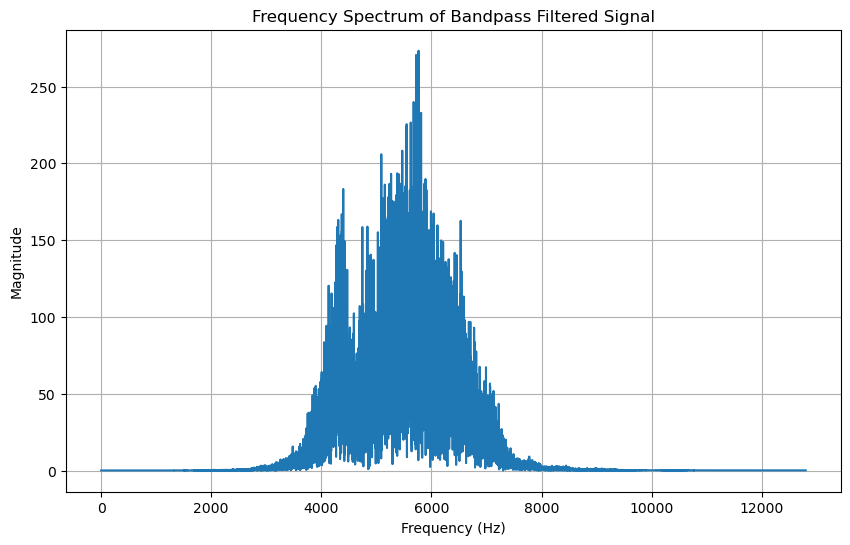

In [11]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def bandpass_filter(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate  # 나이퀴스트 주파수
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # 대역 통과 필터 생성
    y = lfilter(b, a, data)
    return y

# 샘플링 주파수 및 필터 경계 설정
sampling_rate = 25600  # Hz, 필요시 조정
lowcut = 4000  # 저주파 경계 (Hz)
highcut = 7000  # 고주파 경계 (Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(row_650, lowcut, highcut, sampling_rate)

# 필터링된 신호의 주파수 스펙트럼 계산 (FFT)
fft_filtered = np.fft.fft(filtered_signal)
fft_filtered_magnitude = np.abs(fft_filtered)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sampling_rate)

# 필터링된 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(filtered_signal) // 2], fft_filtered_magnitude[:len(filtered_signal) // 2])
plt.title('Frequency Spectrum of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


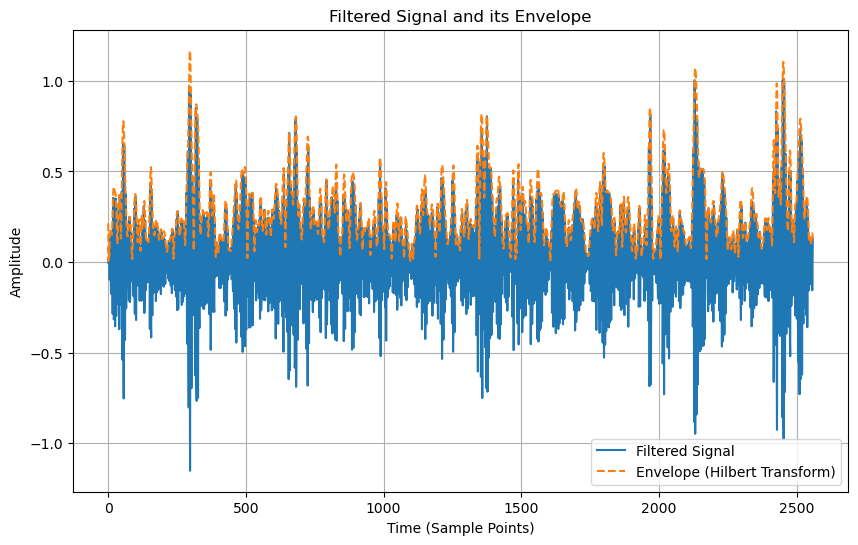

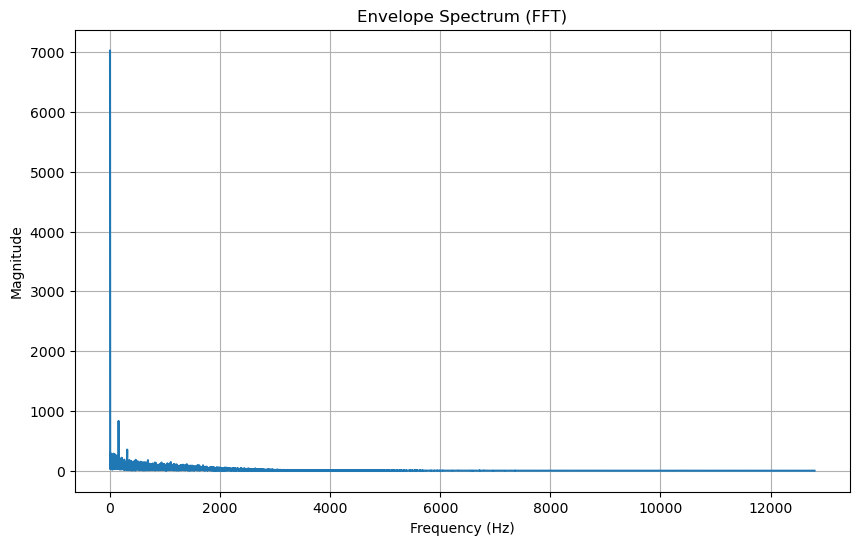

In [12]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_650, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


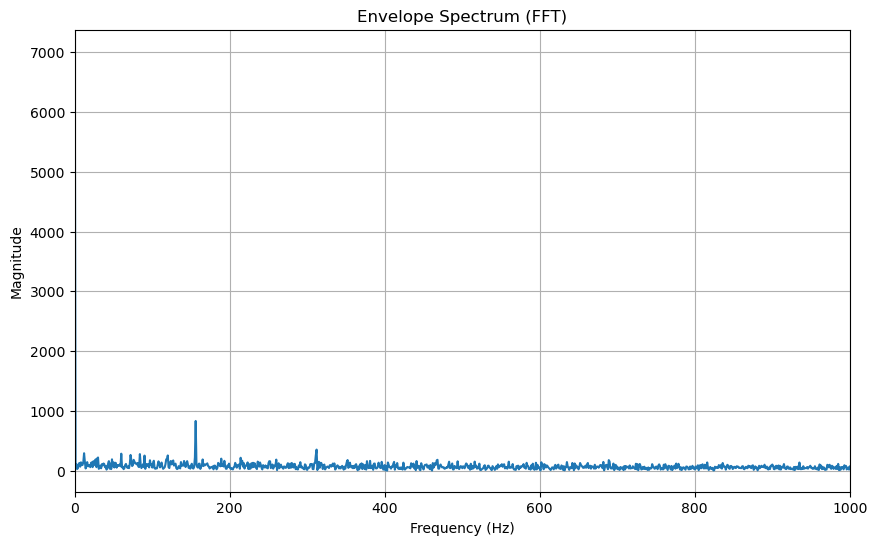

In [14]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_650, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~4000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 1000)  # x축 범위 설정
plt.show()


## 내륜

In [15]:
row_10 = data.iloc[9, :-1].values

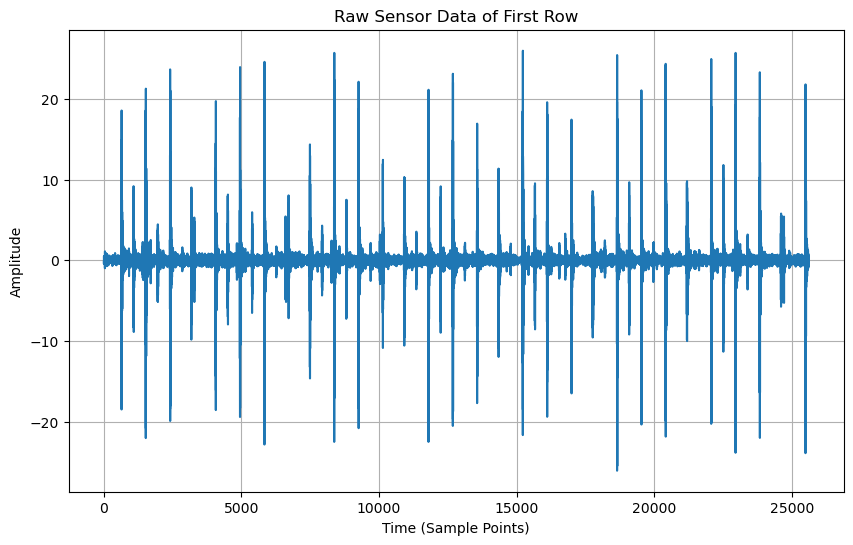

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(row_10)
plt.title('Raw Sensor Data of First Row')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

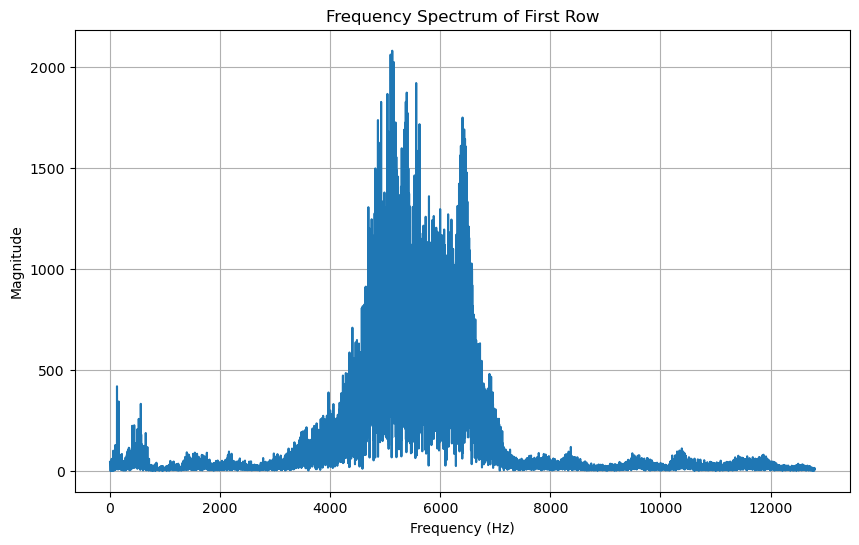

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 적용
fft_values = np.fft.fft(row_10)
fft_magnitude = np.abs(fft_values)  # FFT 결과의 절댓값을 사용하여 크기 계산
n = len(row_10)
sampling_rate = 25600  # 샘플링 주파수, 필요시 변경
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # 주파수 축 생성

# 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], fft_magnitude[:n // 2])  # 양의 주파수 성분만 시각화
plt.title('Frequency Spectrum of First Row')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

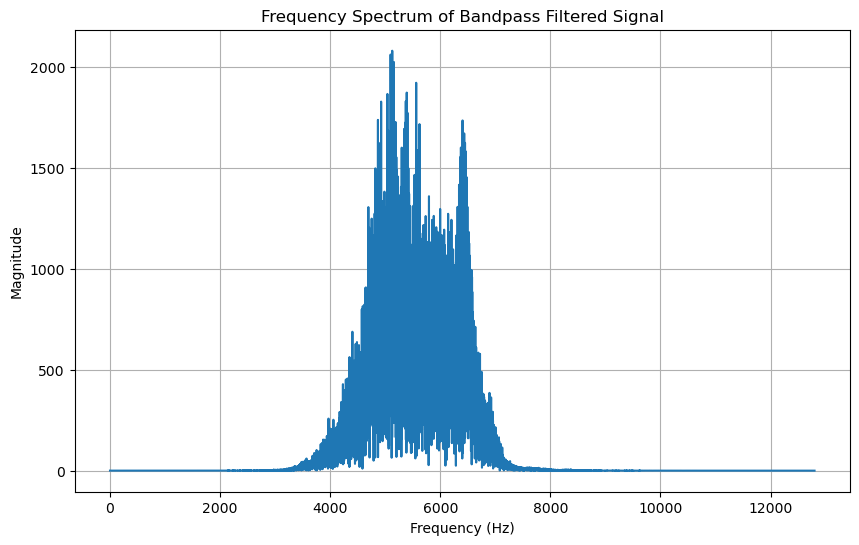

In [18]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def bandpass_filter(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate  # 나이퀴스트 주파수
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # 대역 통과 필터 생성
    y = lfilter(b, a, data)
    return y

# 샘플링 주파수 및 필터 경계 설정
sampling_rate = 25600  # Hz, 필요시 조정
lowcut = 4000  # 저주파 경계 (Hz)
highcut = 7000  # 고주파 경계 (Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 필터링된 신호의 주파수 스펙트럼 계산 (FFT)
fft_filtered = np.fft.fft(filtered_signal)
fft_filtered_magnitude = np.abs(fft_filtered)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sampling_rate)

# 필터링된 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(filtered_signal) // 2], fft_filtered_magnitude[:len(filtered_signal) // 2])
plt.title('Frequency Spectrum of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


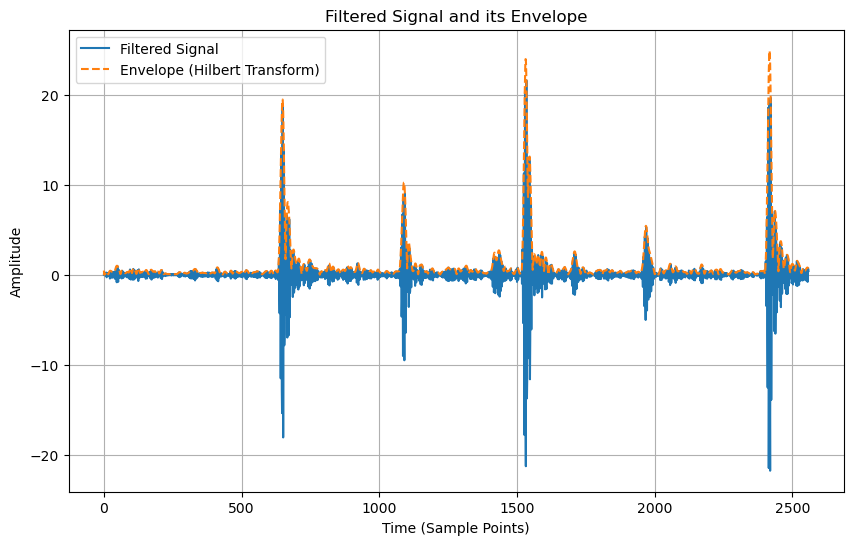

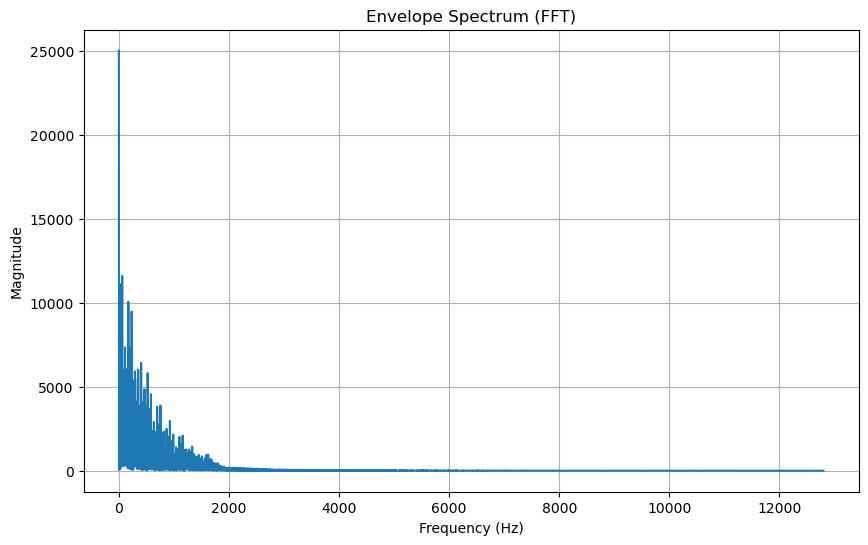

In [19]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


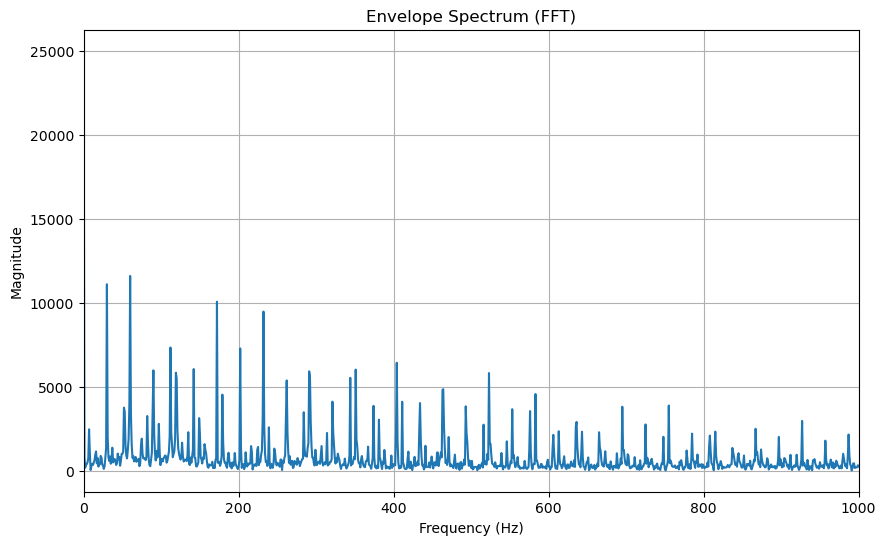

In [20]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_10, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~4000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 1000)  # x축 범위 설정
plt.show()


## 롤러

In [21]:
row_350 = data.iloc[349, :-1].values

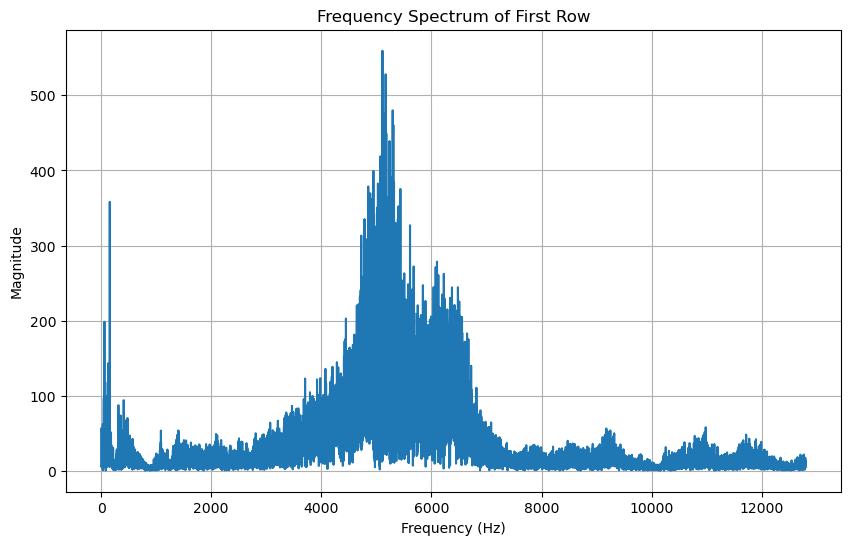

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 적용
fft_values = np.fft.fft(row_350)
fft_magnitude = np.abs(fft_values)  # FFT 결과의 절댓값을 사용하여 크기 계산
n = len(row_350)
sampling_rate = 25600  # 샘플링 주파수, 필요시 변경
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # 주파수 축 생성

# 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], fft_magnitude[:n // 2])  # 양의 주파수 성분만 시각화
plt.title('Frequency Spectrum of First Row')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

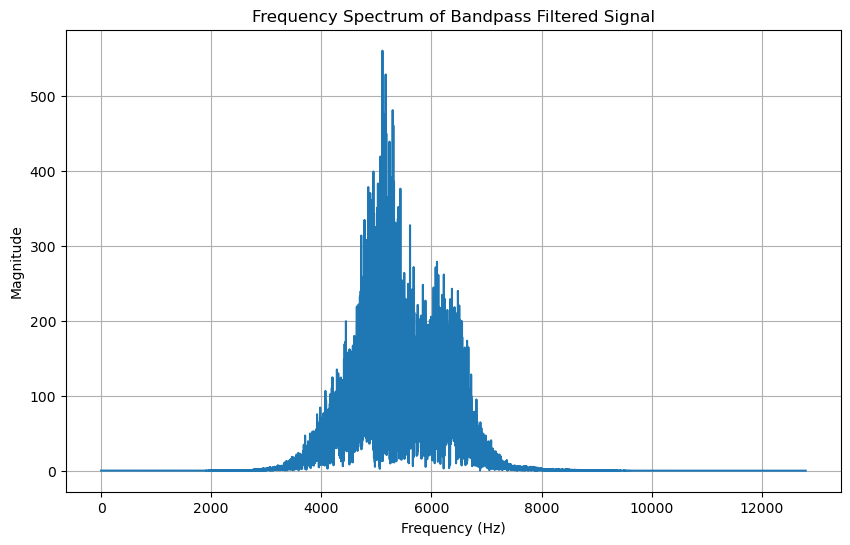

In [26]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def bandpass_filter(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate  # 나이퀴스트 주파수
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # 대역 통과 필터 생성
    y = lfilter(b, a, data)
    return y

# 샘플링 주파수 및 필터 경계 설정
sampling_rate = 25600  # Hz, 필요시 조정
lowcut = 4000  # 저주파 경계 (Hz)
highcut = 7000  # 고주파 경계 (Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(row_350, lowcut, highcut, sampling_rate)

# 필터링된 신호의 주파수 스펙트럼 계산 (FFT)
fft_filtered = np.fft.fft(filtered_signal)
fft_filtered_magnitude = np.abs(fft_filtered)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sampling_rate)

# 필터링된 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(filtered_signal) // 2], fft_filtered_magnitude[:len(filtered_signal) // 2])
plt.title('Frequency Spectrum of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


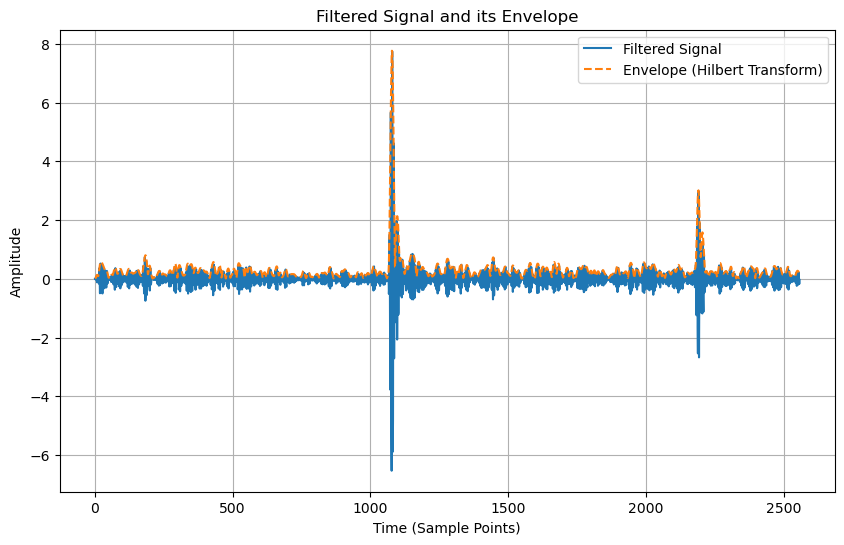

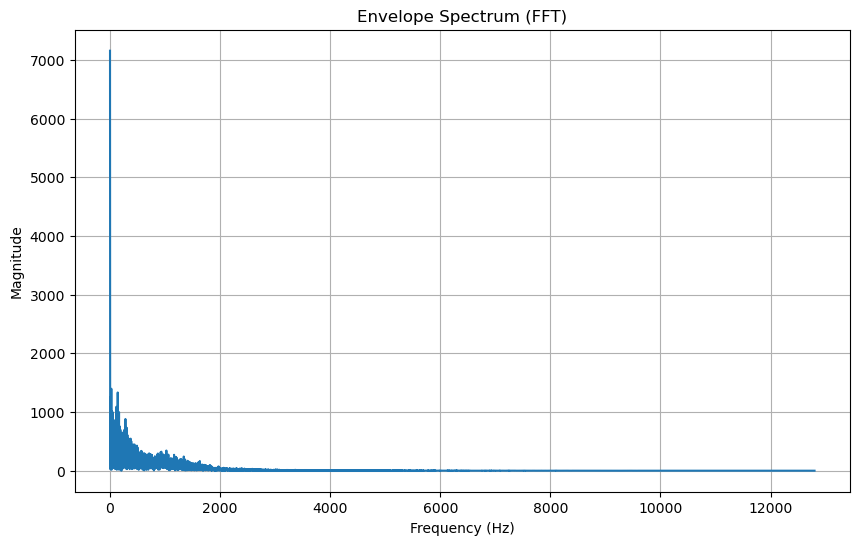

In [27]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_350, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


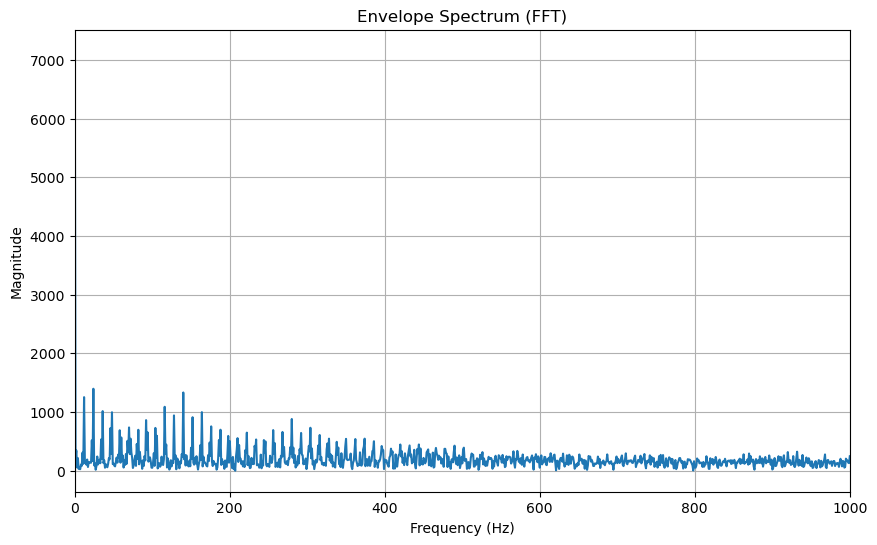

In [28]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_350, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~4000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 1000)  # x축 범위 설정
plt.show()
